<a href="https://colab.research.google.com/github/jsm-UOC/tensorflowCourse/blob/main/ClassificationANNCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification with TensorFlow

## Creating data

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

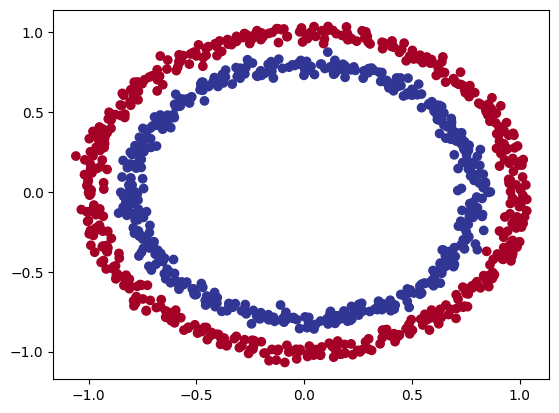

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu );

## Modelling


In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 9s 19ms/step - loss: 5.4799 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 9ms/step - loss: 5.4934 - accuracy: 0.5230
Epoch 3/5
32/32 [==============================] - 0s 14ms/step - loss: 5.5602 - accuracy: 0.5040
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 4.4540 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 15ms/step - loss: 1.4165 - accuracy: 0.5000


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932393908500671, 0.5]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5130


[0.6984348297119141, 0.5130000114440918]

In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.48550144],
       [0.5635524 ],
       [0.56786567],
       [0.5730743 ],
       [0.44131008],
       [0.5768632 ],
       [0.5583573 ],
       [0.48001972],
       [0.4802301 ],
       [0.5760656 ],
       [0.5195353 ],
       [0.52883315],
       [0.5655499 ],
       [0.45597336],
       [0.4494466 ],
       [0.46227   ],
       [0.5464628 ],
       [0.46519116],
       [0.553147  ],
       [0.5085971 ],
       [0.5042986 ],
       [0.59098405],
       [0.4611627 ],
       [0.4888334 ],
       [0.58837026],
       [0.5759101 ],
       [0.55156475],
       [0.46070454],
       [0.458416  ],
       [0.4529675 ],
       [0.48215863],
       [0.5801037 ],
       [0.55608255],
       [0.4599599 ],
       [0.46100348],
       [0.59428096],
       [0.57594997],
       [0.52836984],
       [0.45932096],
       [0.5082236 ],
       [0.50459415],
       [0.5451613 ],
       [0.5161159 ],
       [0.45553604],
       [0.5279359 ],
       [0.5446685 ],
       [0.4482747 ],
       [0.543

## Visualize model's prediction

In [ ]:
import numpy as np

def plot_decision_boundary(model, X=X, y=y):

  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary Classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Binary Classification


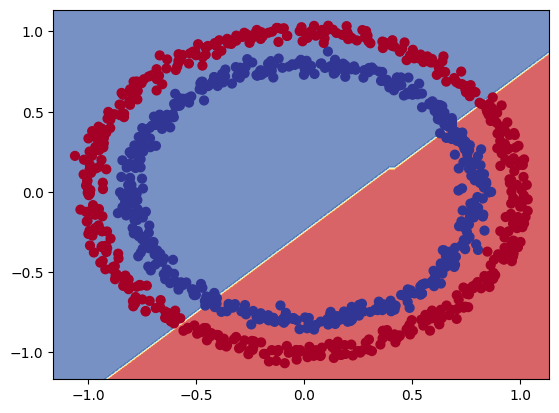

In [ ]:
plot_decision_boundary(model_3)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.swish),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.swish),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["accuracy"])
my_callbacks = [tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10, restore_best_weights=True)]

history_4 = model_4.fit(X, y, epochs=1000, verbose=0, callbacks=my_callbacks)
model_4.evaluate(X, y)


32/32 [==============================] - 0s 3ms/step - loss: 6.1396e-04 - accuracy: 1.0000


[0.0006139571196399629, 1.0]

313/313 [==============================] - 1s 2ms/step
Binary Classification


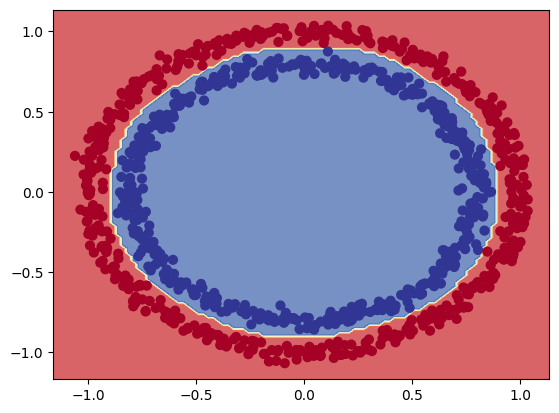

In [ ]:
plot_decision_boundary(model_4)

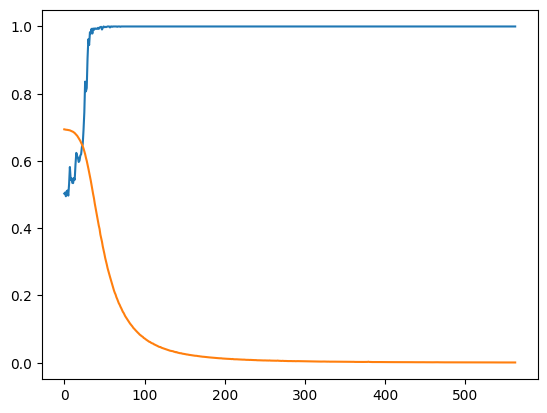

In [ ]:
plt.plot(history_4.history["accuracy"])
plt.plot(history_4.history["loss"])

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_5 = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.1484 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1352 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1263 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1232 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1099 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1096 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1030 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1080 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1073 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1070 - accuracy: 0.4880
Epoch 11/

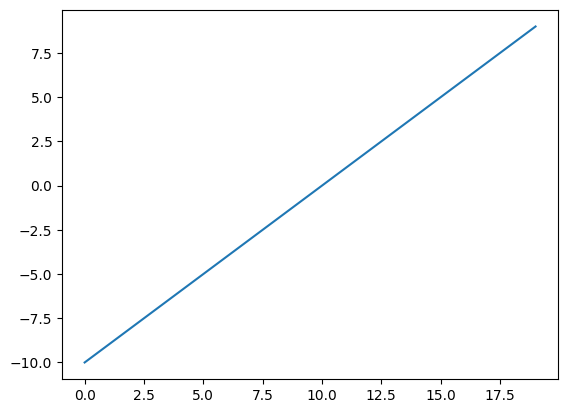

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(A)

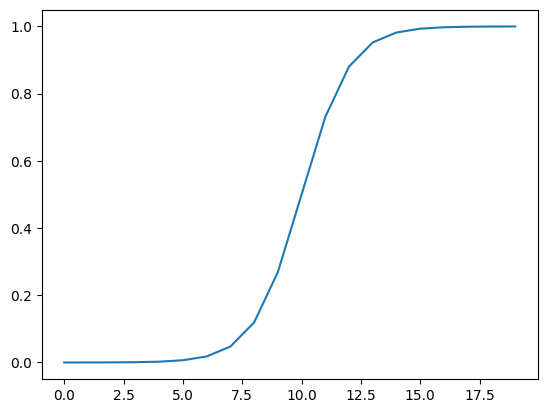

In [ ]:
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

plt.plot(sigmoid(A))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [ ]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.swish),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.swish),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["accuracy"])
my_callbacks = [tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10, restore_best_weights=True)]

history_6 = model_6.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=my_callbacks)
model_6.evaluate(X, y)
model_6.evaluate(X_train, y_train)
model_6.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000


[0.0032520375680178404, 1.0]

In [ ]:
tf.random.set_seed(42)


model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["accuracy"])
my_callbacks = [tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10, restore_best_weights=True)]

history_7 = model_7.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=my_callbacks)
model_7.evaluate(X, y)
model_7.evaluate(X_train, y_train)
model_7.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000


[0.0023641283623874187, 1.0]

313/313 [==============================] - 0s 1ms/step
Binary Classification
313/313 [==============================] - 0s 1ms/step
Binary Classification
313/313 [==============================] - 0s 1ms/step
Binary Classification
313/313 [==============================] - 0s 1ms/step
Binary Classification


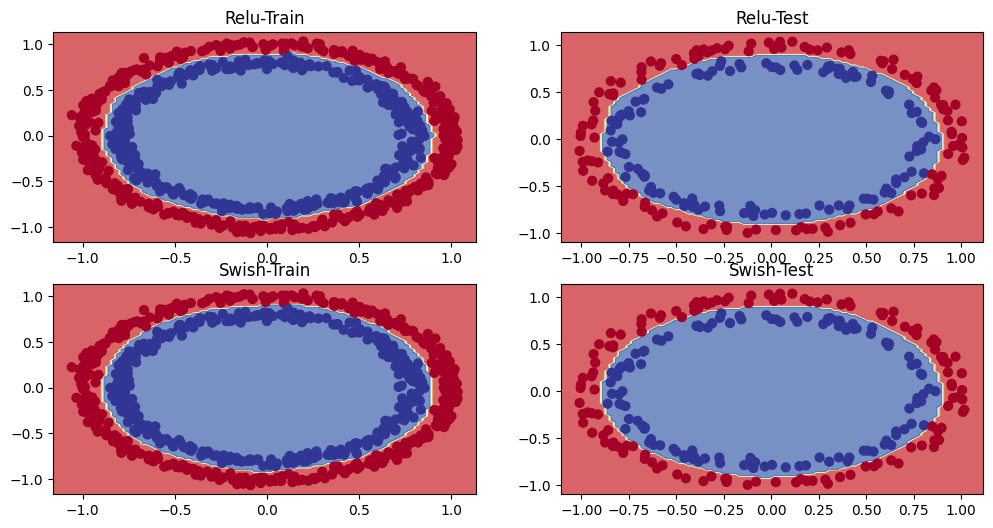

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.title("Relu-Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(2,2,2)
plt.title("Relu-Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.subplot(2,2,3)
plt.title("Swish-Train")
plot_decision_boundary(model_6, X=X_train, y=y_train)
plt.subplot(2,2,4)
plt.title("Swish-Test")
plot_decision_boundary(model_6, X=X_test, y=y_test)

In [ ]:
len(history_6.history["accuracy"])
plt.plot(history_6.history["accuracy"])

615

In [ ]:
pd.DataFrame(history_6.history)

,loss,accuracy
0,0.692913,0.506667
1,0.692553,0.526667
2,0.692071,0.534667
3,0.691770,0.545333
4,0.691371,0.537333
...,...,...
610,0.000586,1.000000
611,0.000596,1.000000
612,0.000550,1.000000
613,0.000531,1.000000


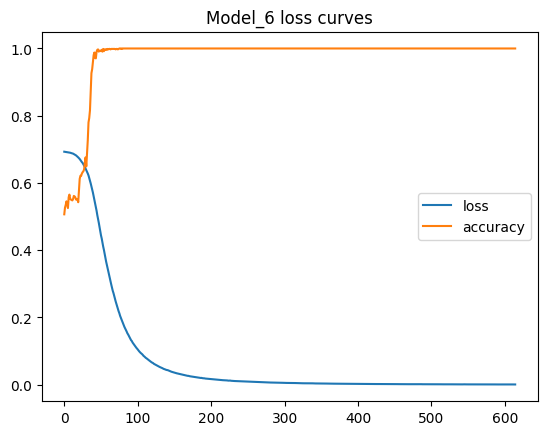

In [ ]:
pd.DataFrame(history_6.history).plot()
plt.title("Model_6 loss curves");

## Finding the best lr

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.4933 - lr: 1.0000e-04
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5040 - lr: 1.1220e-04
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5040 - lr: 1.2589e-04
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5027 - lr: 1.4125e-04
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5027 - lr: 1.5849e-04
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5080 - lr: 1.7783e-04
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5107 - lr: 1.9953e-04
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5080 - lr: 2.2387e-04
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss:

313/313 [==============================] - 1s 2ms/step
Binary Classification


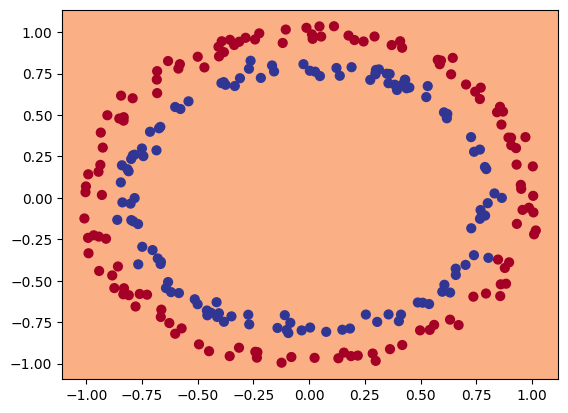

In [ ]:
plot_decision_boundary(model_9, X=X_test, y=y_test)

<Axes: xlabel='epochs'>

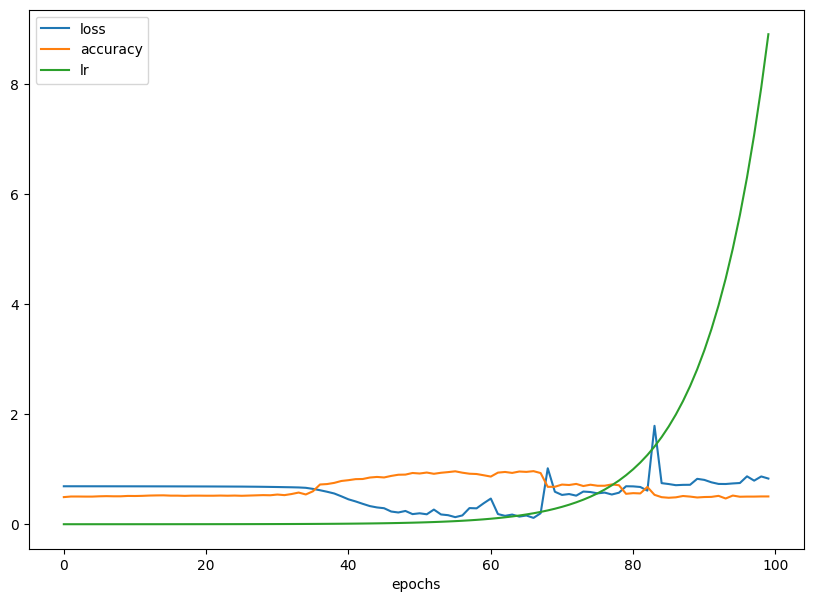

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

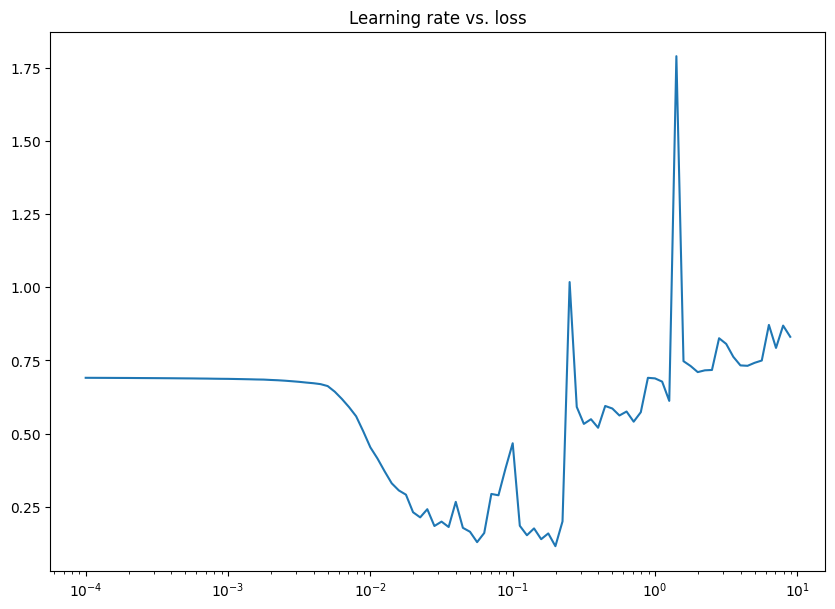

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.title("Learning rate vs. loss")

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])


history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
24/24 [==============================] - 3s 5ms/step - loss: 0.6822 - accuracy: 0.5707
Epoch 2/20
24/24 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.5827
Epoch 3/20
24/24 [==============================] - 0s 5ms/step - loss: 0.6318 - accuracy: 0.7693
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.8693
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.8853
Epoch 6/20
24/24 [==============================] - 0s 5ms/step - loss: 0.3652 - accuracy: 0.9267
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: 0.2661 - accuracy: 0.9667
Epoch 8/20
24/24 [==============================] - 0s 5ms/step - loss: 0.1785 - accuracy: 0.9933
Epoch 9/20
24/24 [==============================] - 0s 5ms/step - loss: 0.1388 - accuracy: 0.9960
Epoch 10/20
24/24 [==============================] - 0s 4ms/step - loss: 0.1083 - accuracy: 0.9973
Epoch 11/20
24/24 [

In [ ]:
model_10.evaluate(X_test, y_test)

8/8 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.9880


[0.0534609854221344, 0.9879999756813049]

313/313 [==============================] - 1s 3ms/step
Binary Classification
313/313 [==============================] - 1s 3ms/step
Binary Classification


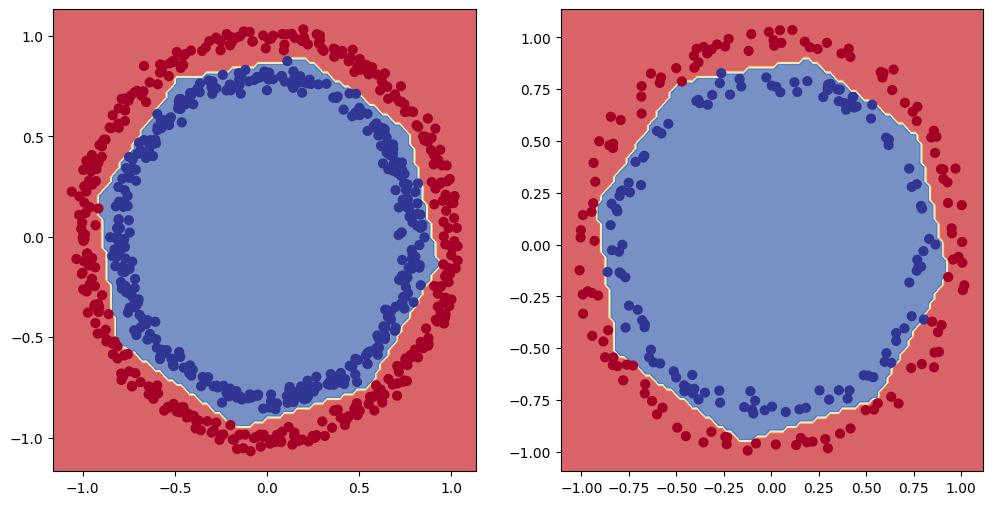

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_10, X=X_test, y=y_test)

## More evaluation methods



### Loss and Accuracy

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 6ms/step - loss: 0.0535 - accuracy: 0.9880
Model loss on the test set: 0.0534609854221344
Model accuracy on the test set: 98.80%


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)

confusion_matrix(y_test, tf.round(y_pred))

8/8 [==============================] - 0s 3ms/step


array([[128,   1],
       [  2, 119]])

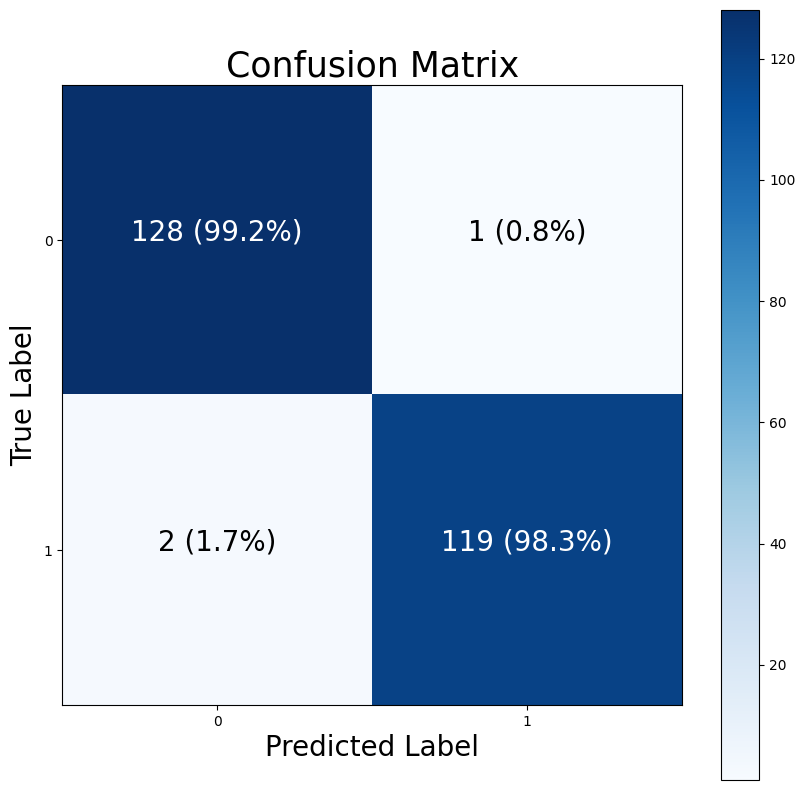

In [ ]:
def plot_confusion_matrix(y_test=y_test, y_pred=y_pred, classes=False):
  import itertools

  figsize = (10, 10)

  cm = confusion_matrix(y_test, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)

  ax.title.set_size(25)

  threshold = (cm.max() + cm.min())/2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=20)

plot_confusion_matrix()

# Multiclass Classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

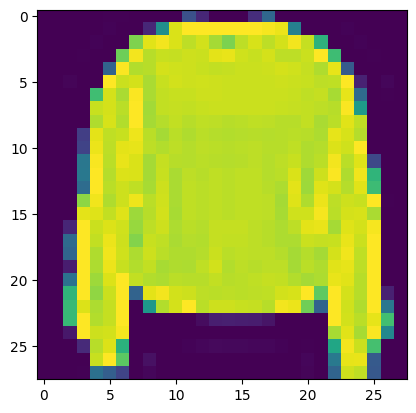

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Dress')

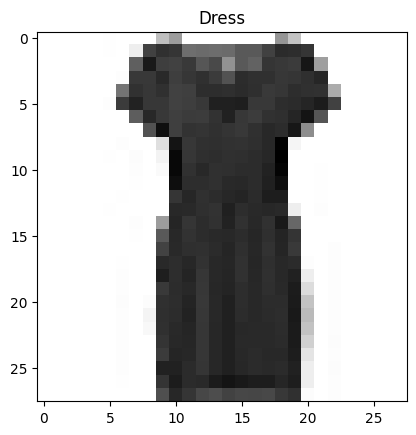

In [ ]:
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

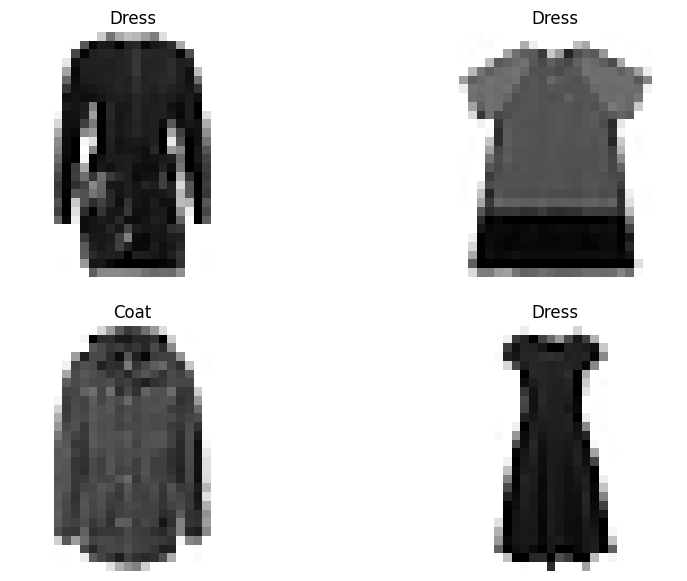

In [ ]:
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


In [ ]:
train_data[0].shape, len(class_names)

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 2.3027 - accuracy: 0.1384 - val_loss: 2.0179 - val_accuracy: 0.2269
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8572 - accuracy: 0.2771 - val_loss: 1.6962 - val_accuracy: 0.3082
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5877 - accuracy: 0.3584 - val_loss: 1.5524 - val_accuracy: 0.3739
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4386 - accuracy: 0.3941 - val_loss: 1.3585 - val_accuracy: 0.4330
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2563 - accuracy: 0.4604 - val_loss: 1.5234 - val_accuracy: 0.3637
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2002 - accuracy: 0.4850 - val_loss: 1.1943 - val_accuracy: 0.4850
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1629 - accuracy: 0.4987 - val_loss: 1.1757 - val_accuracy

In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data.min(), train_data.max()

(0, 255)

train_data_norm = train_data /255.0
test_data_norm = test_data/255.0